In [1]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf

from glob import glob
from tqdm import tqdm

import matplotlib.pyplot as plt
from PIL import Image

In [2]:
X = []  # List to store image data
Y = []  # List to store corresponding labels

# Process Open Eyes images
for i in tqdm(glob('G:/Projects/Drowsiness Detection/Paper/train/Open_Eyes/*.jpg')):
    # Read image, convert to grayscale, resize to 224x224, and convert to numpy array
    temp = np.array(Image.open(i).convert('L').resize((224,224)))  
    # Add an additional axis for the channel to make it compatible with TensorFlow's input shape
    X.append(temp[:,:,np.newaxis])  
    # Append label 1 (Open Eyes) to the label list
    Y.append(1)
    
# Process Closed Eyes images
for i in tqdm(glob('G:/Projects/Drowsiness Detection/Paper/train/Closed_Eyes/*.jpg')):
    # Read image, convert to grayscale, resize to 224x224, and convert to numpy array
    temp = np.array(Image.open(i).convert('L').resize((224,224)))  
    # Add an additional axis for the channel to make it compatible with TensorFlow's input shape
    X.append(temp[:,:,np.newaxis])  
    # Append label 0 (Closed Eyes) to the label list
    Y.append(0)


100%|██████████| 1192/1192 [00:00<00:00, 1502.99it/s]


In [3]:

X = np.array(X)
# Normalize the pixel values to the range [0, 1]
X = X / 255.0
# Convert the list of labels to a numpy array
Y = np.array(Y)


In [4]:
# Expand the dimensions of the image data array to include an additional axis at the end
X = np.expand_dims(X, -1)


In [5]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets, with 33% of the data used for testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, BatchNormalization, MaxPooling2D,Dropout, Flatten

model = tf.keras.models.Sequential([
      Input(shape=(224, 224, 1)),

      Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu'),
      Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu', use_bias=False),
      BatchNormalization(),
      MaxPooling2D(strides = 2),
      Dropout(0.3),

      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu'),
      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu', use_bias=False),
      BatchNormalization(),
      MaxPooling2D(strides = 2),
      Dropout(0.3),

      Flatten(),
      Dense(units  = 256, activation = 'relu', use_bias=False),
      BatchNormalization(),

      Dense(units = 128, use_bias=False, activation = 'relu'),

      Dense(units = 84, use_bias=False, activation = 'relu'),
      BatchNormalization(),
      Dropout(0.3),

      Dense(units = 1, activation = 'sigmoid')
  ])

In [7]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 32)      832       
                                                                 
 conv2d_1 (Conv2D)           (None, 216, 216, 32)      25600     
                                                                 
 batch_normalization (Batch  (None, 216, 216, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 108, 108, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 108, 108, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 106, 106, 64)      1

In [8]:
# Create a ModelCheckpoint callback to save the best model weights
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='bestModel.h5',  
    save_weights_only=False,  # Save entire model 
    monitor='val_loss',  # Monitor validation loss
    mode='min',  # Minimize validation loss
    save_best_only=True,  # Save only the best model
    verbose=1  
)

# Train the model
model.fit(
    x_train,  # Input training data
    y_train,  # Target training data
    validation_split=0.2,  # Use 20% of training data for validation
    epochs=50,  # Number of epochs for training
    batch_size=32,  # Batch size for training
    callbacks=[callback]  # List of callbacks to apply during training
)


Epoch 1/50


41/41 [==============================] - ETA: 0s - loss: 0.7218 - accuracy: 0.6317
Epoch 1: val_loss improved from inf to 0.66576, saving model to bestModel.h5


c:\Users\V1TrAy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


41/41 [==============================] - 69s 2s/step - loss: 0.7218 - accuracy: 0.6317 - val_loss: 0.6658 - val_accuracy: 0.5385
Epoch 2/50
41/41 [==============================] - ETA: 0s - loss: 0.5455 - accuracy: 0.7227
Epoch 2: val_loss did not improve from 0.66576
41/41 [==============================] - 126s 3s/step - loss: 0.5455 - accuracy: 0.7227 - val_loss: 0.8523 - val_accuracy: 0.5292
Epoch 3/50
41/41 [==============================] - ETA: 0s - loss: 0.4234 - accuracy: 0.8020
Epoch 3: val_loss did not improve from 0.66576
41/41 [==============================] - 123s 3s/step - loss: 0.4234 - accuracy: 0.8020 - val_loss: 1.2725 - val_accuracy: 0.5292
Epoch 4/50
41/41 [==============================] - ETA: 0s - loss: 0.3051 - accuracy: 0.8814
Epoch 4: val_loss did not improve from 0.66576
41/41 [==============================] - 123s 3s/step - loss: 0.3051 - accuracy: 0.8814 - val_loss: 1.9259 - val_accuracy: 0.5292
Epoch 5/50
41/41 [==============================] - ETA: 0

In [9]:
# Evaluate the model on the test data
model.evaluate(x_test, y_test)


25/25 [==============================] - 4s 149ms/step - loss: 0.6581 - accuracy: 0.8225


[0.6581031084060669, 0.8224999904632568]

In [10]:
from keras.models import load_model
# Load the  model
best_model = load_model('bestModel.h5')

# Evaluate the best model on the test data
best_model.evaluate(x_test, y_test)

25/25 [==============================] - 4s 149ms/step - loss: 0.4162 - accuracy: 0.8700


[0.41618263721466064, 0.8700000047683716]

1/1 [==============================] - 0s 20ms/step


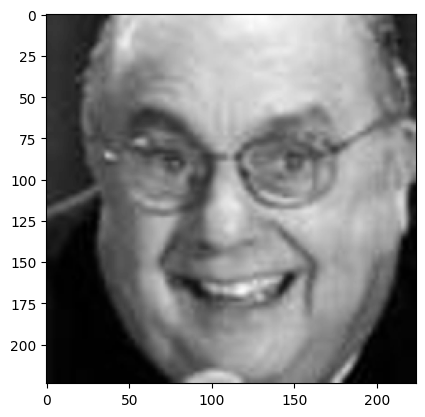

Open
1/1 [==============================] - 0s 23ms/step


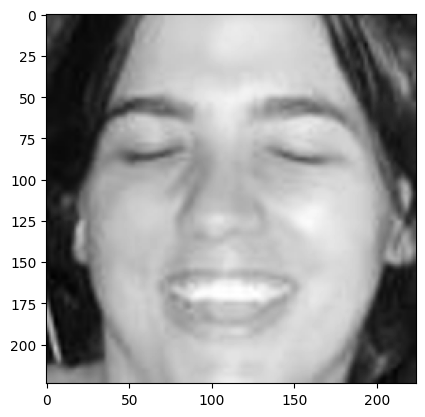

Closed
1/1 [==============================] - 0s 24ms/step


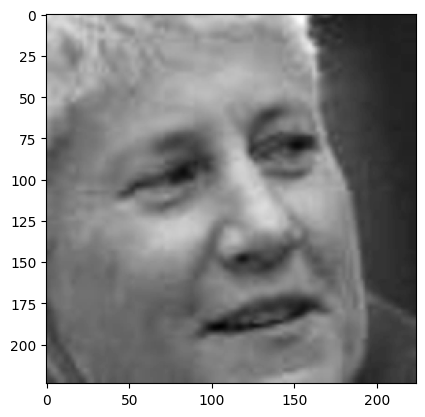

Open
1/1 [==============================] - 0s 22ms/step


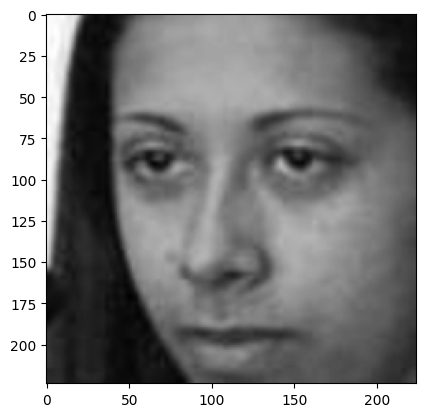

Open
1/1 [==============================] - 0s 22ms/step


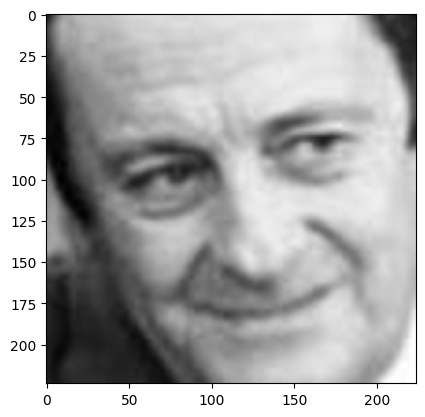

Open
1/1 [==============================] - 0s 22ms/step


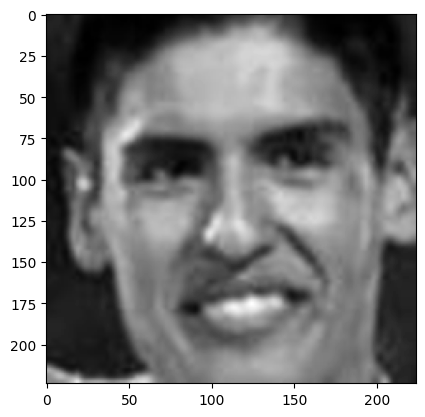

Open
1/1 [==============================] - 0s 22ms/step


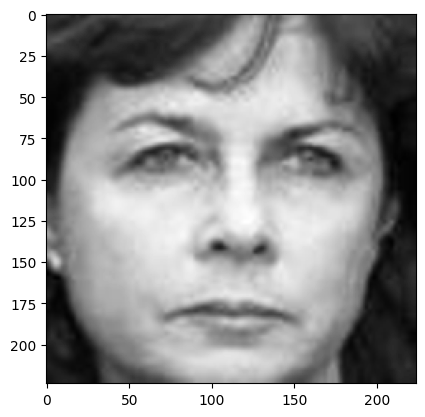

Open
1/1 [==============================] - 0s 25ms/step


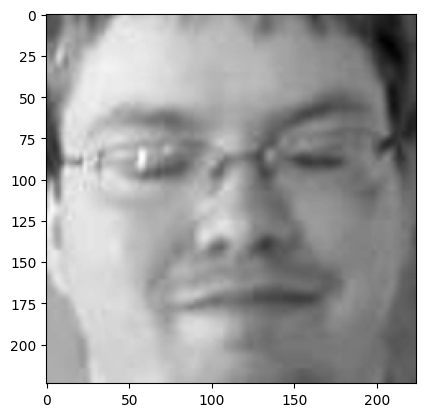

Closed
1/1 [==============================] - 0s 23ms/step


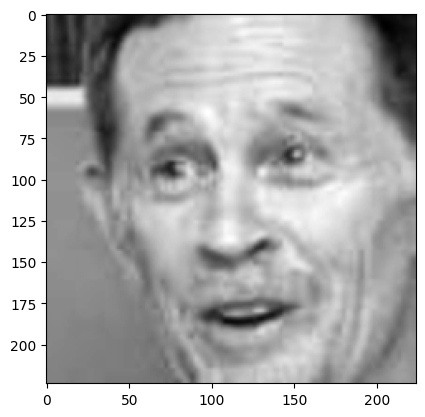

Open
1/1 [==============================] - 0s 28ms/step


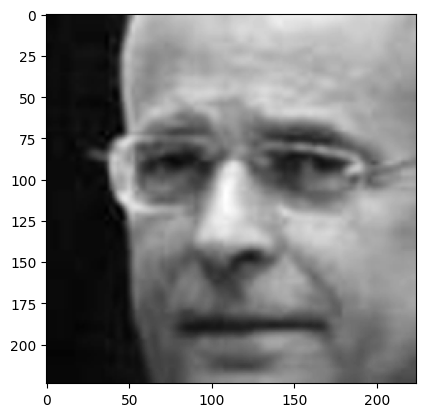

Open


In [19]:
import matplotlib.pyplot as plt

#  binary classification 
for i in x_test[0:10]:
    result = best_model.predict(np.expand_dims(i, 0))
    # Remove the single-channel dimension
    i = np.squeeze(i, axis=-1)
    plt.imshow(i, cmap='gray') 
    plt.show()

    if result[0][0] > 0.5:  # Probability of the positive class
        print('Open')
    else:
        print("Closed")
